In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

# 그래프에서 '-' 기호가 문제가 생길 수 있음
mpl.rcParams['axes.unicode_minus'] = False

font_path = './font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
total = pd.read_csv('./data/finedust_predict(2018~2020).csv', encoding='utf-8-sig', index_col=0)
total.head()

,PM10,평균기온(°C),일강수량(mm),평균 풍속(m/s),최다풍향(16방위),평균 증기압(hPa),평균 현지기압(hPa),합계 일사량(MJ/m2),평균 전운량(1/10),평균 지면온도(°C)
날짜,,,,,,,,,,
2018-01-01,33.0,-1.3,0.0,1.4,290,2.1,1016.8,6.14,1.0,-1.7
2018-01-02,32.0,-1.8,0.0,1.8,290,2.2,1018.1,5.36,2.3,-2.3
2018-01-03,30.0,-4.7,0.0,2.2,290,1.8,1019.9,6.56,3.6,-3.4
2018-01-04,39.0,-4.7,0.0,1.4,290,1.8,1016.5,4.73,6.5,-3.3
2018-01-05,48.0,-3.0,0.0,1.7,290,2.4,1010.3,5.96,3.6,-2.6


In [34]:
x_data = total.drop('PM10', axis=1, inplace=False)
t_data = total['PM10'].to_numpy().reshape(-1,1)
print(x_data.shape)
print(t_data.shape)

(1096, 9)
(1096, 1)


In [35]:
scaler_x = StandardScaler()
scaler_t = StandardScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

norm_x_data = scaler_x.transform(x_data)
norm_t_data = scaler_t.transform(t_data)

In [36]:
model = Sequential([
    Dense(64,activation='relu', input_shape=(9,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['mae', 'mse', 'accuracy'])

In [38]:
history = model.fit(norm_x_data, norm_t_data,
                    epochs=500,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2608 - mae: 0.8147 - mse: 1.2608 - accuracy: 0.0000e+00 - val_loss: 0.8294 - val_mae: 0.6580 - val_mse: 0.8294 - val_accuracy: 0.0000e+00
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1.1221 - mae: 0.7559 - mse: 1.1221 - accuracy: 0.0000e+00 - val_loss: 0.7447 - val_mae: 0.6201 - val_mse: 0.7447 - val_accuracy: 0.0000e+00
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0267 - mae: 0.7144 - mse: 1.0267 - accuracy: 0.0000e+00 - val_loss: 0.6904 - val_mae: 0.5984 - val_mse: 0.6904 - val_accuracy: 0.0000e+00
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9673 - mae: 0.6903 - mse: 0.9673 - accuracy: 0.0000e+00 - val_loss: 0.6539 - val_mae: 0.5856 - val_mse: 0.6539 - val_accuracy: 0.0000e+00
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9252 - mae: 0.6751 - mse: 0.9252 - accuracy: 0.0000e+00 - val_loss: 0.634

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
495,0.481557,0.482882,0.481557,0.0,0.675511,0.597122,0.675511,0.0,495
496,0.480790,0.479473,0.480790,0.0,0.671407,0.596145,0.671407,0.0,496
497,0.480686,0.480960,0.480686,0.0,0.667169,0.593888,0.667169,0.0,497
498,0.480119,0.480952,0.480119,0.0,0.670152,0.595621,0.670152,0.0,498
499,0.479568,0.479502,0.479568,0.0,0.668187,0.594266,0.668187,0.0,499


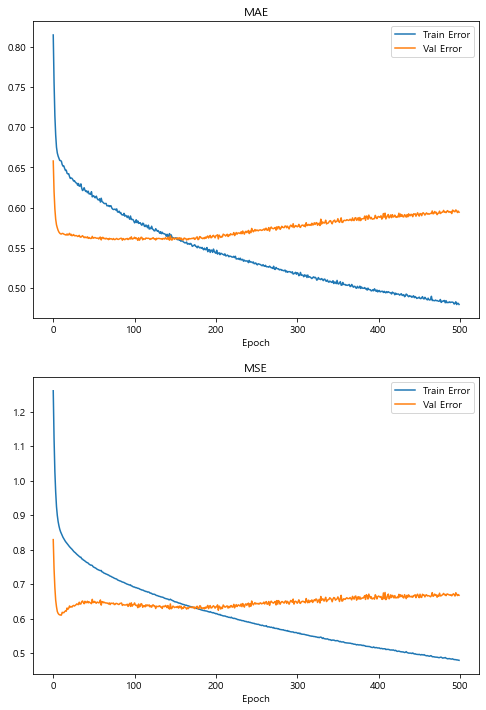

In [40]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.title('MAE')
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.title('MSE')
  plt.show()

plot_history(history)

In [41]:
norm_x_data

array([[-1.39394606, -0.29303389, -0.89576106, ..., -1.10335624,
        -1.25316498, -1.45117885],
       [-1.4417132 , -0.29303389, -0.31527082, ..., -1.21382962,
        -0.83544332, -1.50371658],
       [-1.71876257, -0.29303389,  0.26521942, ..., -1.04387057,
        -0.41772166, -1.60003574],
       ...,
       [ 0.60272011,  2.92155511, -0.46039338, ...,  0.00987551,
         0.70691358,  0.54525465],
       [ 0.69825438, -0.29303389,  2.44205783, ...,  0.65288723,
         0.5462514 ,  0.62406123],
       [ 0.5645064 , -0.29303389,  1.86156759, ...,  0.4333568 ,
         0.86757575,  0.51898579]])

# PCA

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(norm_x_data)
pca_x_data = pca.transform(norm_x_data)
print(pca_x_data.shape)

(1096, 3)


In [44]:
df = pd.DataFrame(pca_x_data)
df.head()

,0,1,2
0,3.007812,0.146578,-0.473941
1,3.063477,0.420323,-0.010653
2,3.268619,0.554119,0.449387
3,2.841893,1.240966,-0.325866
4,2.571496,0.594512,0.065306


In [45]:
df.columns

RangeIndex(start=0, stop=3, step=1)

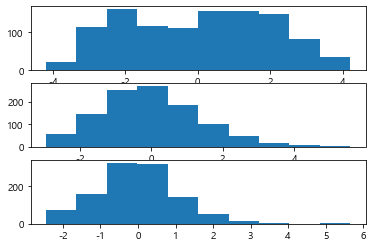

In [46]:
fig = plt.figure()
for i, c in enumerate(df.columns):
    ax=fig.add_subplot(3,1,i+1)
    ax.hist(df[c])
plt.show()

In [47]:
model = Sequential([
    Dense(64,activation='relu', input_shape=(3,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['mae', 'mse'])

history = model.fit(pca_x_data, norm_t_data,
                    epochs=500,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/500
24/24 [==============================] - 1s 23ms/step - loss: 1.4440 - mae: 0.9486 - mse: 1.4440 - val_loss: 1.0657 - val_mae: 0.8487 - val_mse: 1.0657
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1.2910 - mae: 0.8887 - mse: 1.2910 - val_loss: 0.9256 - val_mae: 0.7849 - val_mse: 0.9256
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.1826 - mae: 0.8381 - mse: 1.1826 - val_loss: 0.8145 - val_mae: 0.7292 - val_mse: 0.8145
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0951 - mae: 0.7947 - mse: 1.0951 - val_loss: 0.7393 - val_mae: 0.6886 - val_mse: 0.7393
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0342 - mae: 0.7584 - mse: 1.0342 - val_loss: 0.6845 - val_mae: 0.6556 - val_mse: 0.6845
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9930 - mae: 0.7308 - mse: 0.9930 - val_loss: 0.6512 - val_mae: 0.6323 - val_mse: 0.6512
Epoch 7/500
24/24 [==

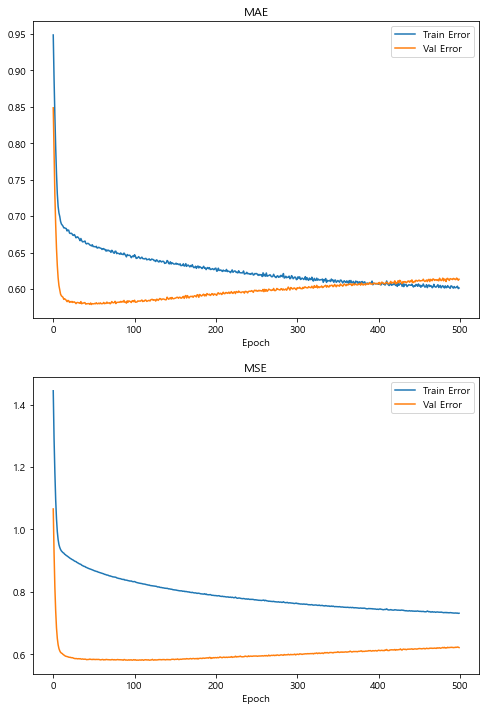

In [48]:
plot_history(history)

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.732534,0.602059,0.732534,0.622873,0.613005,0.622873,495
496,0.731875,0.602766,0.731875,0.622298,0.615123,0.622298,496
497,0.732132,0.603980,0.732132,0.623383,0.614006,0.623383,497
498,0.731214,0.600648,0.731214,0.622792,0.612092,0.622792,498
499,0.731650,0.601466,0.731650,0.621716,0.613519,0.621716,499


Epoch 1/500
24/24 [==============================] - 0s 7ms/step - loss: 1.7654 - mae: 0.7796 - mse: 1.1197 - val_loss: 1.5144 - val_mae: 0.7127 - val_mse: 0.8725
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1.6893 - mae: 0.7413 - mse: 1.0510 - val_loss: 1.4300 - val_mae: 0.6807 - val_mse: 0.7956
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.6394 - mae: 0.7194 - mse: 1.0088 - val_loss: 1.3718 - val_mae: 0.6619 - val_mse: 0.7453
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 1.6061 - mae: 0.7078 - mse: 0.9834 - val_loss: 1.3264 - val_mae: 0.6475 - val_mse: 0.7078
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5797 - mae: 0.7009 - mse: 0.9650 - val_loss: 1.2937 - val_mae: 0.6381 - val_mse: 0.6833
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5591 - mae: 0.6976 - mse: 0.9525 - val_loss: 1.2684 - val_mae: 0.6329 - val_mse: 0.6660
Epoch 7/500
24/24 [===

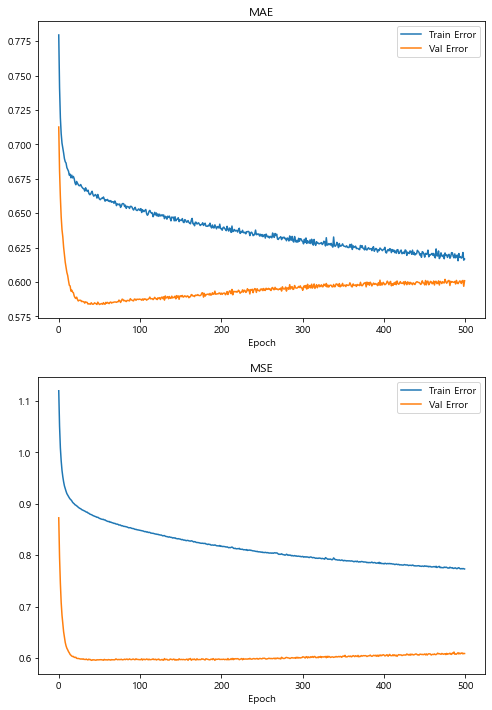

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.824042,0.617394,0.773837,0.659435,0.598970,0.609262,495
496,0.823293,0.618022,0.773170,0.659736,0.600855,0.609666,496
497,0.823923,0.621465,0.773934,0.657739,0.601143,0.607778,497
498,0.823362,0.615885,0.773386,0.658838,0.596891,0.608891,498
499,0.822869,0.616690,0.772984,0.658344,0.600961,0.608527,499


In [51]:
model = Sequential([
    Dense(64,activation='relu', input_shape=(3,),),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['mae', 'mse'])

history = model.fit(pca_x_data, norm_t_data,
                    epochs=500,
                    validation_split=0.3,
                    verbose=1)

plot_history(history)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Epoch 1/500
24/24 [==============================] - 0s 7ms/step - loss: 1.7561 - mae: 0.7850 - mse: 1.1177 - val_loss: 1.2934 - val_mae: 0.6171 - val_mse: 0.6582
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1.6011 - mae: 0.7051 - mse: 0.9687 - val_loss: 1.2505 - val_mae: 0.5946 - val_mse: 0.6213
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5683 - mae: 0.6928 - mse: 0.9419 - val_loss: 1.2313 - val_mae: 0.5920 - val_mse: 0.6080
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5497 - mae: 0.6916 - mse: 0.9292 - val_loss: 1.2202 - val_mae: 0.5870 - val_mse: 0.6027
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5354 - mae: 0.6872 - mse: 0.9208 - val_loss: 1.2086 - val_mae: 0.5859 - val_mse: 0.5970
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5226 - mae: 0.6842 - mse: 0.9137 - val_loss: 1.1992 - val_mae: 0.5856 - val_mse: 0.5934
Epoch 7/500
24/24 [===

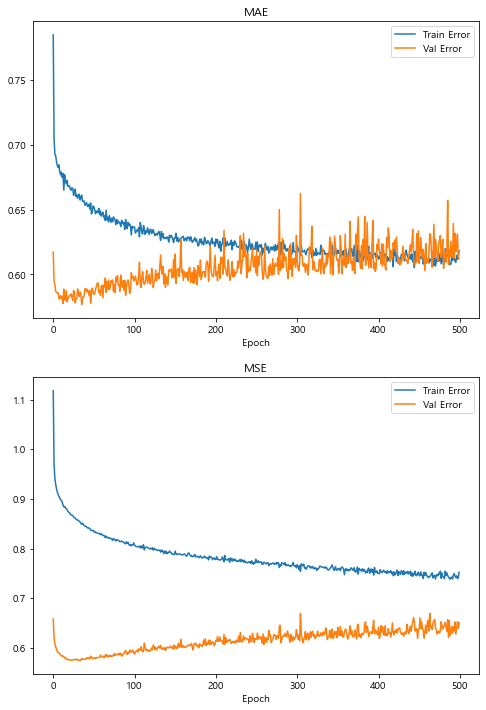

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.775494,0.609255,0.741564,0.661673,0.617343,0.627813,495
496,0.778900,0.614632,0.745024,0.673456,0.621459,0.639672,496
497,0.773332,0.611463,0.739498,0.686563,0.630999,0.652834,497
498,0.774493,0.612391,0.740721,0.673305,0.612780,0.639534,498
499,0.785798,0.618424,0.752003,0.684424,0.612202,0.650651,499


In [52]:
model = Sequential([
    Dense(64,activation='relu', input_shape=(3,),),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae', 'mse'])

history = model.fit(pca_x_data, norm_t_data,
                    epochs=500,
                    validation_split=0.3,
                    verbose=1)

plot_history(history)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

# GIGO
Garbage In Garbage Out